# Predictive Analytics

### Loading relevant libraries and the data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Loading the data

data = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
# Features in the given dataset 

print(data.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [5]:
# Dropping irrelevent features 

data=data[["txn_description","balance","age","amount","customer_id"]]
data.head()

,txn_description,balance,age,amount,customer_id
0,POS,35.39,26,16.25,CUS-2487424745
1,SALES-POS,21.20,26,14.19,CUS-2487424745
2,POS,5.71,38,6.42,CUS-2142601169
3,SALES-POS,2117.22,40,40.90,CUS-1614226872
4,SALES-POS,17.95,26,3.25,CUS-2487424745


In [6]:
# Getting unique customer data 
cust_data= data.groupby(["customer_id"]).mean().reset_index()
cust_data.head()

,customer_id,balance,age,amount
0,CUS-1005756958,2275.852055,53,222.862603
1,CUS-1117979751,9829.929000,21,339.843700
2,CUS-1140341822,5699.212250,28,212.632500
3,CUS-1147642491,9032.841186,34,245.600169
4,CUS-1196156254,22272.433755,34,147.145796


In [7]:
# Salary for each customer 


cust_salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
cust_salary=cust_salary[["customer_id","amount"]]
cust_salary=cust_salary.rename(columns = {'amount':'salary'})
cust_salary['Annual_Salary'] = cust_salary['salary']*12
cust_salary.head()

,customer_id,salary,Annual_Salary
0,CUS-1005756958,970.47,11645.64
1,CUS-1117979751,3578.65,42943.80
2,CUS-1140341822,1916.51,22998.12
3,CUS-1147642491,1711.39,20536.68
4,CUS-1196156254,3903.73,46844.76


array([[<AxesSubplot:title={'center':'Annual_Salary'}>]], dtype=object)

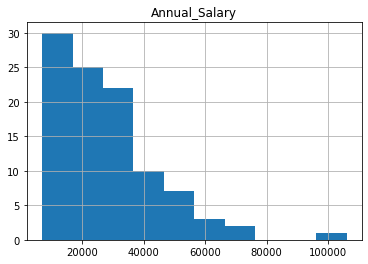

In [8]:
cust_salary.hist('Annual_Salary')

In [9]:
# Adding Salary to our unique customer dataset

customer_data=pd.merge(cust_data, cust_salary, on="customer_id")
customer_data.head()

,customer_id,balance,age,amount,salary,Annual_Salary
0,CUS-1005756958,2275.852055,53,222.862603,970.47,11645.64
1,CUS-1117979751,9829.929000,21,339.843700,3578.65,42943.80
2,CUS-1140341822,5699.212250,28,212.632500,1916.51,22998.12
3,CUS-1147642491,9032.841186,34,245.600169,1711.39,20536.68
4,CUS-1196156254,22272.433755,34,147.145796,3903.73,46844.76


### Observing correlation between various features and salary

<AxesSubplot:xlabel='age', ylabel='Annual_Salary'>

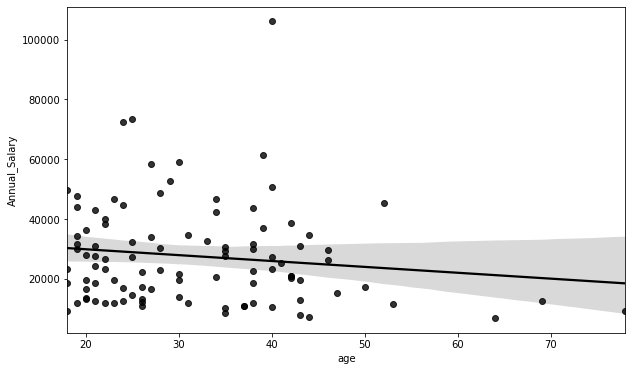

In [10]:
# Observing correlation between cutomer age and salary
plt.figure(figsize=(10, 6))
sns.regplot("age", "Annual_Salary", data=customer_data,color = "black")

<AxesSubplot:xlabel='balance', ylabel='Annual_Salary'>

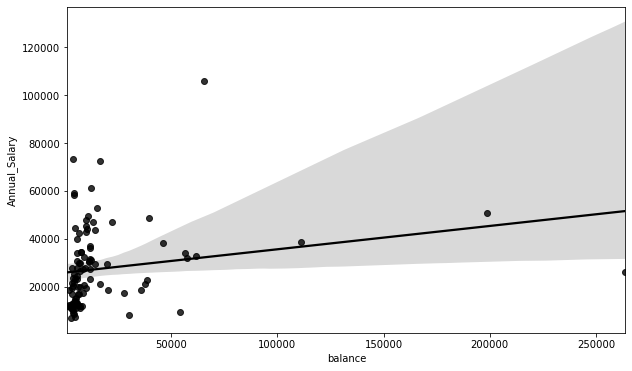

In [11]:
# Observing correlation between cutomer balance and salary
plt.figure(figsize=(10, 6))
sns.regplot("balance", "Annual_Salary", data=customer_data,color = "black")

<AxesSubplot:xlabel='amount', ylabel='Annual_Salary'>

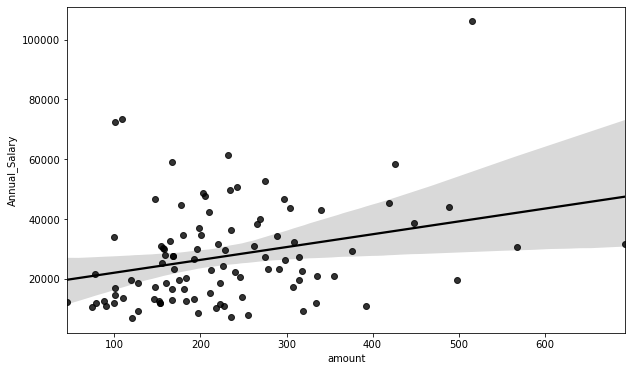

In [12]:
# Observing correlation between cutomer transaction amount and salary
plt.figure(figsize=(10, 6))
sns.regplot("amount", "Annual_Salary", data=customer_data,color = "black")

### Extracting features

In [13]:
### Mean Spending/Payments by the customer

payment_data=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment_data=payment_data[["customer_id","amount"]]
payment_data=payment_data.rename(columns = {'amount':'payment'})
payment_data.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


### Preparing dataset for model building

In [14]:
## Merging Customer data with payment data 
Customer_Data = pd.merge(customer_data,payment_data, on = "customer_id")
Customer_Data.head()

,customer_id,balance,age,amount,salary,Annual_Salary,payment
0,CUS-1005756958,2275.852055,53,222.862603,970.47,11645.64,144.000000
1,CUS-1117979751,9829.929000,21,339.843700,3578.65,42943.80,98.925000
2,CUS-1140341822,5699.212250,28,212.632500,1916.51,22998.12,142.000000
3,CUS-1147642491,9032.841186,34,245.600169,1711.39,20536.68,96.185185
4,CUS-1196156254,22272.433755,34,147.145796,3903.73,46844.76,43.100000


In [15]:
# Separating independent features and target variable 

X=Customer_Data[["age","balance","payment"]].values
y=Customer_Data["Annual_Salary"].values

In [16]:
# Splitting our data 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Implementing Linear Regression Model

In [17]:
lr = LinearRegression()

lr.fit(X_train, y_train)
    
y_pred=lr.predict(X_test)

print('Coefficient of determination for test data: ', r2_score(y_test, y_pred))

print('Root mean squared error for test data: ', mean_squared_error(y_test, y_pred, squared=False))

Coefficient of determination for test data:  0.025489206195758896
Root mean squared error for test data:  17648.31748807569


### Implementing Decision Tree Model

In [18]:
dt = DecisionTreeRegressor(max_depth = 2)

dt.fit(X_train, y_train)

y_pred_dt=dt.predict(X_test)

print('Root mean squared error for test data: ', mean_squared_error(y_test, y_pred_dt, squared=False))

Root mean squared error for test data:  15353.543065199556


### Testing our models 

In [19]:
## For Linear Regression 

print("The linear regression model predicts salary will be=",lr.predict([[50,9000,140]])[0])
#print(lr.predict([[50,9000,140]])[0])

## For Decision Tree

print("The dedcision tree model predicts salary will be=",dt.predict([[50,9000,140]])[0])
#print(dt.predict([[50,9000,140]])[0])


The linear regression model predicts salary will be= 20553.639736963964
The dedcision tree model predicts salary will be= 22648.04
